## Sports Analytics Project ⚽

This is soccer results predict project


In [ ]:
# pip install pandas numpy matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.6-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (109 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x8

In [8]:
import sqlite3
import pandas as pd

In [9]:
# Define the SQLite file path
DB_PATH = "data/raw/database.sqlite"  # change if yours is elsewhere

In [10]:
# Connect to the database
conn = sqlite3.connect(DB_PATH)

In [11]:
# Check available table names
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


In [12]:
# Load main tables into DataFrames
match_df = pd.read_sql("SELECT * FROM Match", conn)
team_df = pd.read_sql("SELECT * FROM Team", conn)
league_df = pd.read_sql("SELECT * FROM League", conn)

# Optional close connection
conn.close()

In [15]:
# Shapes of the tables
print("Match shape:", match_df.shape)
print("Team shape:", team_df.shape)
print("League shape:", league_df.shape)

Match shape: (25979, 115)
Team shape: (299, 5)
League shape: (11, 3)


In [16]:
# Null values in Match
match_df.isna().mean().sort_values(ascending=False).head(10)

PSD     0.570114
PSA     0.570114
PSH     0.570114
BSH     0.454906
BSA     0.454906
BSD     0.454906
GBD     0.454867
GBH     0.454867
GBA     0.454867
card    0.452750
dtype: float64

In [17]:
# Add target column: match result
def get_result(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 'Home'
    elif row['home_team_goal'] < row['away_team_goal']:
        return 'Away'
    else:
        return 'Draw'

match_df['result'] = match_df.apply(get_result, axis=1)


In [27]:
match_df[["home_team_goal", "away_team_goal", "result"]]

,home_team_goal,away_team_goal,result
0,1,1,Draw
1,0,0,Draw
2,0,3,Away
3,5,0,Home
4,1,3,Away
...,...,...,...
25974,1,0,Home
25975,1,2,Away
25976,2,0,Home
25977,0,0,Draw


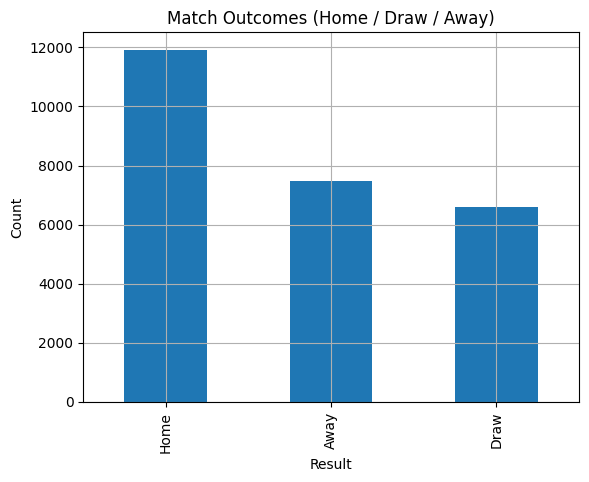

In [28]:
import matplotlib.pyplot as plt

# Plot match outcomes
match_df['result'].value_counts().plot(kind='bar')
plt.title("Match Outcomes (Home / Draw / Away)")
plt.xlabel("Result")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Goals Distribution (Home vs Away)

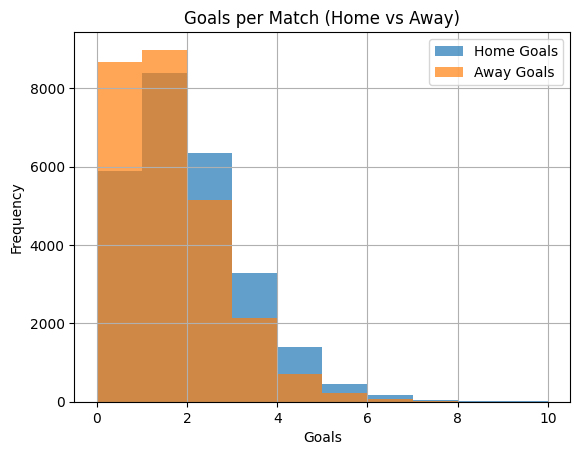

In [29]:
plt.hist(match_df['home_team_goal'], bins=range(0, 11), alpha=0.7, label='Home Goals')
plt.hist(match_df['away_team_goal'], bins=range(0, 11), alpha=0.7, label='Away Goals')
plt.title("Goals per Match (Home vs Away)")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


### Matches Per Season

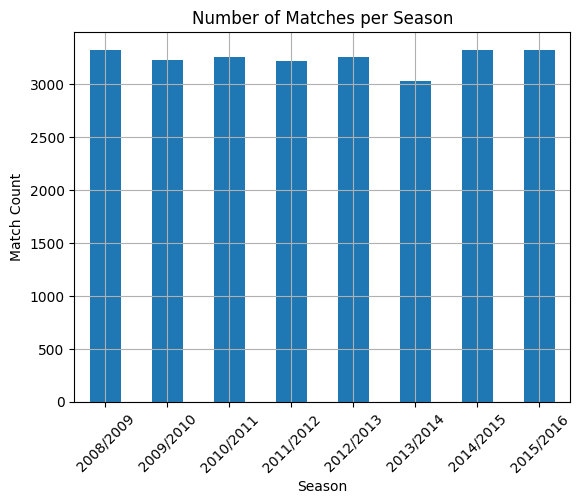

In [30]:
match_df['season'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Matches per Season")
plt.xlabel("Season")
plt.ylabel("Match Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [31]:
league_df

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


### Match Outcome Distribution

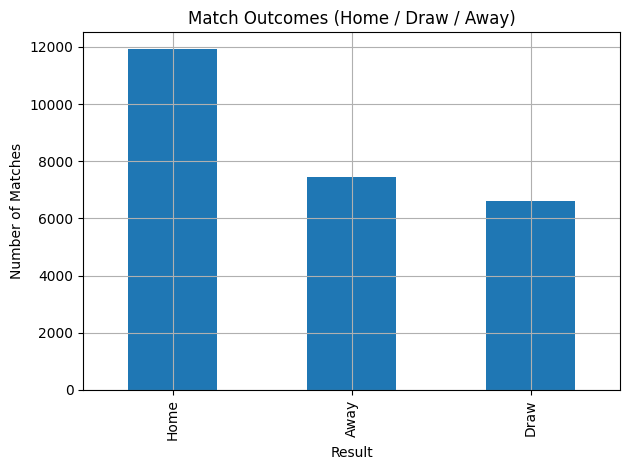

In [32]:
import matplotlib.pyplot as plt

# Plot distribution of match outcomes
match_df['result'].value_counts().plot(kind='bar')

plt.title("Match Outcomes (Home / Draw / Away)")
plt.xlabel("Result")
plt.ylabel("Number of Matches")
plt.grid(True)
plt.tight_layout()
plt.show()